In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
%matplotlib inline

In [3]:
from datetime import datetime

In [4]:
tech_list=["AAPL","GOOG","MSFT","AMZN"]

In [5]:
AAPL=pd.read_csv("AAPL.csv")
GOOG=pd.read_csv("GOOG.csv")
MSFT=pd.read_csv("MSFT.csv")
AMZN=pd.read_csv("AMZN.csv")

In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,160.047024,161.230992,158.833294,160.077778,158.876072,2.943054e+07
std,11.612185,11.759871,11.519237,11.603564,12.179453,1.231491e+07
min,139.389999,141.220001,138.619995,140.679993,138.489182,1.402670e+07
25%,151.097504,152.397503,149.580006,150.557499,149.168121,2.094318e+07
50%,158.795006,160.000000,157.579994,158.650002,157.246308,2.598295e+07
75%,171.334995,172.897499,170.119999,171.382496,171.019596,3.384192e+07
max,182.589996,183.500000,180.210007,181.720001,181.720001,8.659380e+07


In [7]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


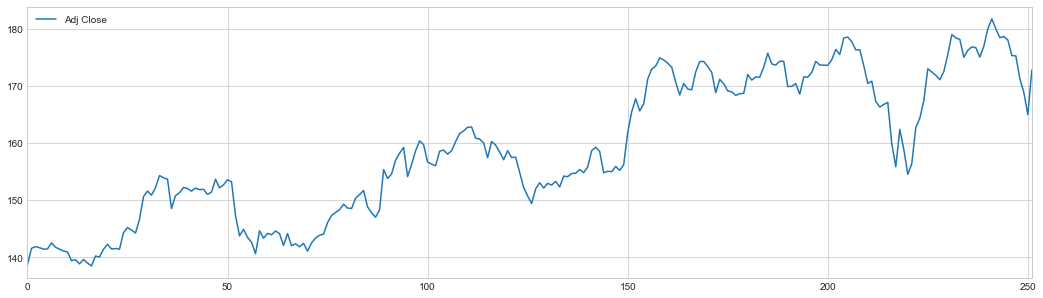

In [8]:
AAPL["Adj Close"].plot(legend=True,kind="line",figsize=(18,5))

In [9]:
AAPL.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-27,139.389999,141.220001,138.619995,140.880005,138.686066,23575100
1,2017-03-28,140.910004,144.039993,140.619995,143.800003,141.560577,33374800
2,2017-03-29,143.679993,144.490005,143.190002,144.119995,141.875595,29190000
3,2017-03-30,144.190002,144.500000,143.500000,143.929993,141.688553,21207300
4,2017-03-31,143.720001,144.270004,143.009995,143.660004,141.422775,19661700
5,2017-04-03,143.710007,144.119995,143.050003,143.699997,141.462158,19985700
6,2017-04-04,143.250000,144.889999,143.169998,144.770004,142.515488,19891400


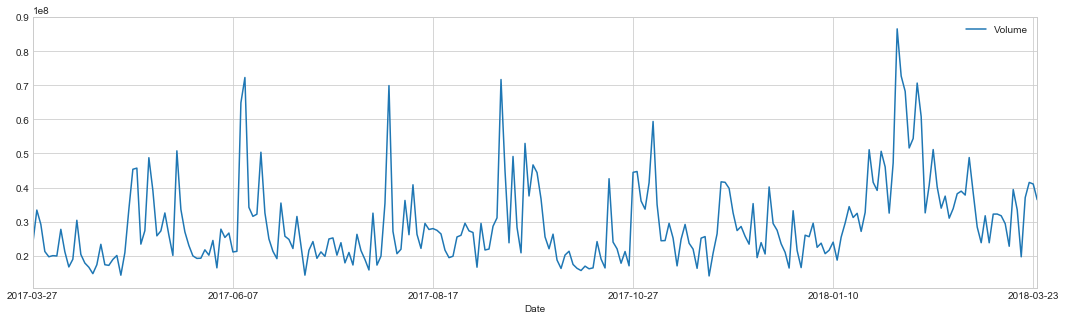

In [10]:
AAPL.plot(x="Date",y="Volume", legend=True,kind="line",figsize=(18,5))

In [11]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="ma in {} days".format(ma)
    AAPL[column_name]=pd.Series.rolling(AAPL["Adj Close"],ma).mean()

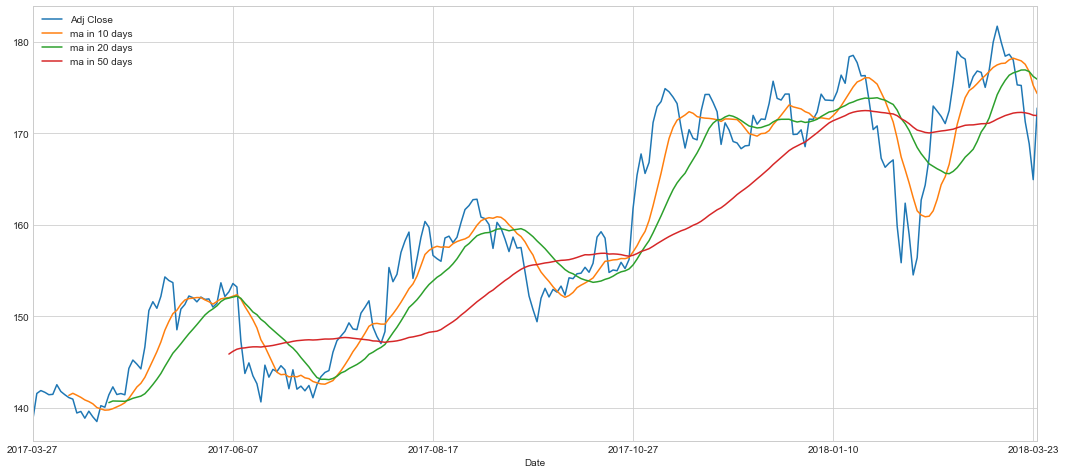

In [12]:
AAPL[["Date","Adj Close","ma in 10 days","ma in 20 days","ma in 50 days"]].plot(x="Date",legend=True,figsize=(18,8))

In [13]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

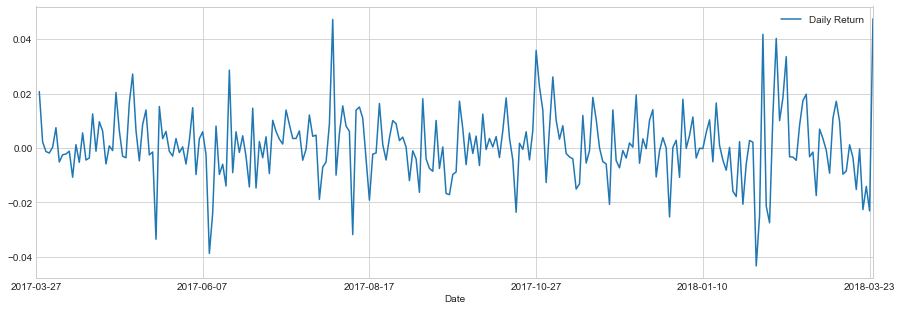

In [14]:
AAPL.plot(x="Date",y="Daily Return",legend=True,figsize=(15,5))

In [15]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ma in 10 days,ma in 20 days,ma in 50 days,Daily Return
0,2017-03-27,139.389999,141.220001,138.619995,140.880005,138.686066,23575100,NaN,NaN,NaN,NaN
1,2017-03-28,140.910004,144.039993,140.619995,143.800003,141.560577,33374800,NaN,NaN,NaN,0.020727
2,2017-03-29,143.679993,144.490005,143.190002,144.119995,141.875595,29190000,NaN,NaN,NaN,0.002225
3,2017-03-30,144.190002,144.500000,143.500000,143.929993,141.688553,21207300,NaN,NaN,NaN,-0.001318
4,2017-03-31,143.720001,144.270004,143.009995,143.660004,141.422775,19661700,NaN,NaN,NaN,-0.001876


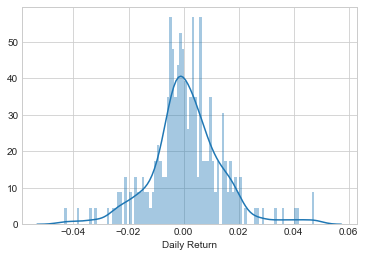

In [16]:
sb.distplot(AAPL["Daily Return"].bfill(),bins=100)

In [17]:
Adj_Closing_df=pd.concat([AAPL["Adj Close"],AMZN["Adj Close"],MSFT["Adj Close"]],keys=["AAPL","MSFT","AMZN"],axis=1)
Adj_Closing_df.head()

,AAPL,MSFT,AMZN
0,138.686066,846.820007,63.764660
1,141.560577,856.000000,63.950768
2,141.875595,874.320007,64.127090
3,141.688553,876.340027,64.362160
4,141.422775,886.539978,64.509079


In [18]:
tech_rets=Adj_Closing_df.pct_change()
tech_rets.head()

,AAPL,MSFT,AMZN
0,NaN,NaN,NaN
1,0.020727,0.010841,0.002919
2,0.002225,0.021402,0.002757
3,-0.001318,0.002310,0.003666
4,-0.001876,0.011639,0.002283


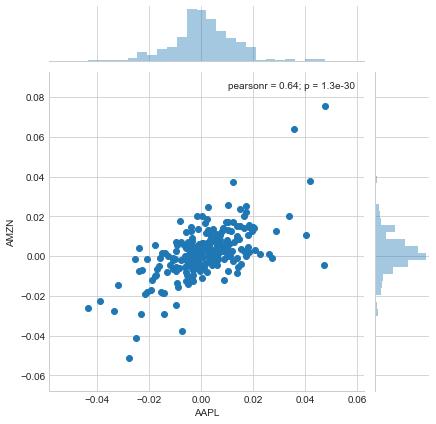

In [19]:
sb.jointplot("AAPL","AMZN",tech_rets)

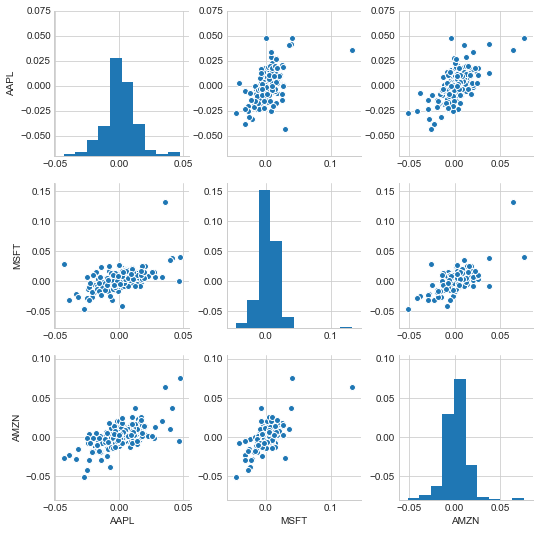

In [20]:
sb.pairplot(tech_rets.dropna())

C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


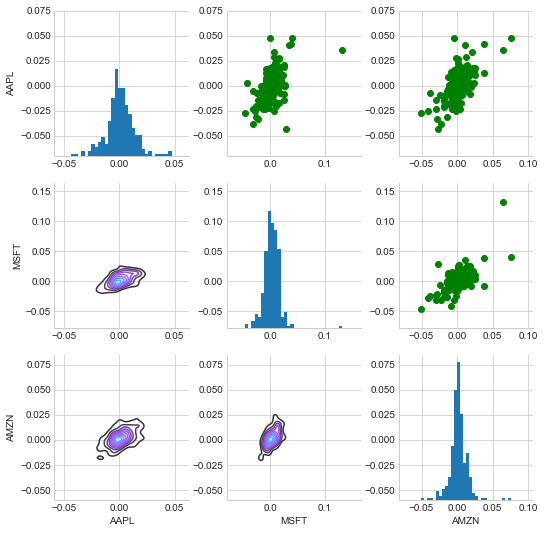

In [22]:
returns_fig=sb.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='g')
returns_fig.map_lower(sb.kdeplot,cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


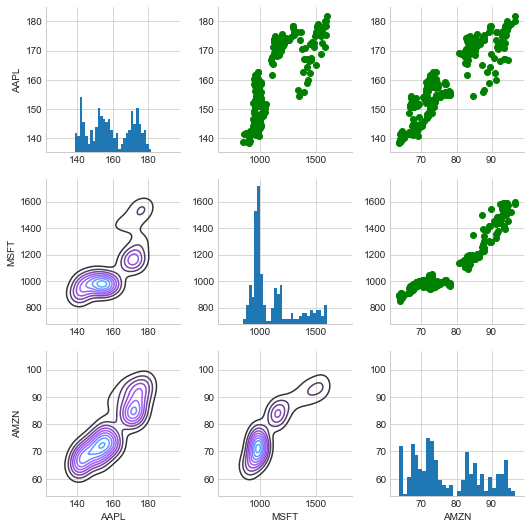

In [23]:
returns_fig=sb.PairGrid(Adj_Closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='g')
returns_fig.map_lower(sb.kdeplot,cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

In [24]:
rets=tech_rets.dropna()

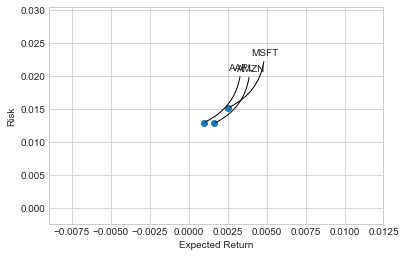

In [25]:
plt.scatter(x=rets.mean(),y=rets.std())
plt.xlabel("Expected Return")
plt.ylabel("Risk")
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))

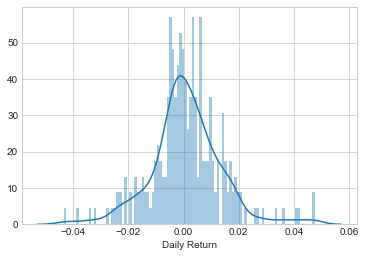

In [28]:
sb.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [29]:
rets['AAPL'].quantile(0.05)

-0.02072077716704146

In [31]:
days=365
dt=1/days
mu=rets.mean()['AAPL']
sigma=rets.std()['AAPL']

In [40]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

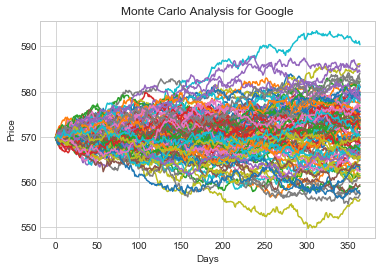

In [41]:
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')